In [5]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas_profiling
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve,KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
from mlxtend.classifier import StackingCVClassifier
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [6]:
# Loading the data set into a pandas data frame

df=pd.read_csv('Train-Test-Telco-Customer-Retention.csv')

print(os.listdir("./"))

['data_preprocess.ipynb', '.DS_Store', 'LICENSE', 'NewData-Telco-Customer-Retention.csv', 'data_clean.ipynb', 'data_prep_test1.ipynb', 'Train-Test-Telco-Customer-Retention.csv', 'README.md', '.gitignore', '.git', 'WA_Fn-UseC_-Telco-Customer-Churn.csv']


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7000 non-null   object 
 1   gender            7000 non-null   object 
 2   SeniorCitizen     7000 non-null   int64  
 3   Partner           7000 non-null   object 
 4   Dependents        7000 non-null   object 
 5   tenure            7000 non-null   int64  
 6   PhoneService      7000 non-null   object 
 7   MultipleLines     7000 non-null   object 
 8   InternetService   7000 non-null   object 
 9   OnlineSecurity    7000 non-null   object 
 10  OnlineBackup      7000 non-null   object 
 11  DeviceProtection  7000 non-null   object 
 12  TechSupport       7000 non-null   object 
 13  StreamingTV       7000 non-null   object 
 14  StreamingMovies   7000 non-null   object 
 15  Contract          7000 non-null   object 
 16  PaperlessBilling  7000 non-null   object 


In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
# Checking the unique values

for col in df:
    print('\n',col,': ', df[col].unique())


 customerID :  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

 gender :  ['Female' 'Male']

 SeniorCitizen :  [0 1]

 Partner :  ['Yes' 'No']

 Dependents :  ['No' 'Yes']

 tenure :  [ 1 34  2 45 28 62 13 16 58 49 25 69 52 71 10 21 12 30 47 72 17 27  5 46
 11 70 63 43 15  8 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68 32
 55 37 36 41  6  4 33 67 23 57 61 14 22 20 53 40 59 24 44 19 54 51 26 39
  0]

 PhoneService :  ['No' 'Yes']

 MultipleLines :  ['No phone service' 'No' 'Yes']

 InternetService :  ['DSL' 'Fiber optic' 'No']

 OnlineSecurity :  ['No' 'Yes' 'No internet service']

 OnlineBackup :  ['Yes' 'No' 'No internet service']

 DeviceProtection :  ['No' 'Yes' 'No internet service']

 TechSupport :  ['No' 'Yes' 'No internet service']

 StreamingTV :  ['No' 'Yes' 'No internet service']

 StreamingMovies :  ['No' 'Yes' 'No internet service']

 Contract :  ['Month-to-month' 'One year' 'Two year']

 PaperlessBilling :  ['Yes' 'No']

 Paymen

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7000.000000,7000.000000,7000.000000,7000.000000
mean,0.162286,32.380143,64.769650,2280.794143
std,0.368739,24.552819,30.088425,2266.933457
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.550000,398.550000
50%,0.000000,29.000000,70.350000,1395.525000
75%,0.000000,55.000000,89.850000,3782.800000
max,1.000000,72.000000,118.750000,8684.800000


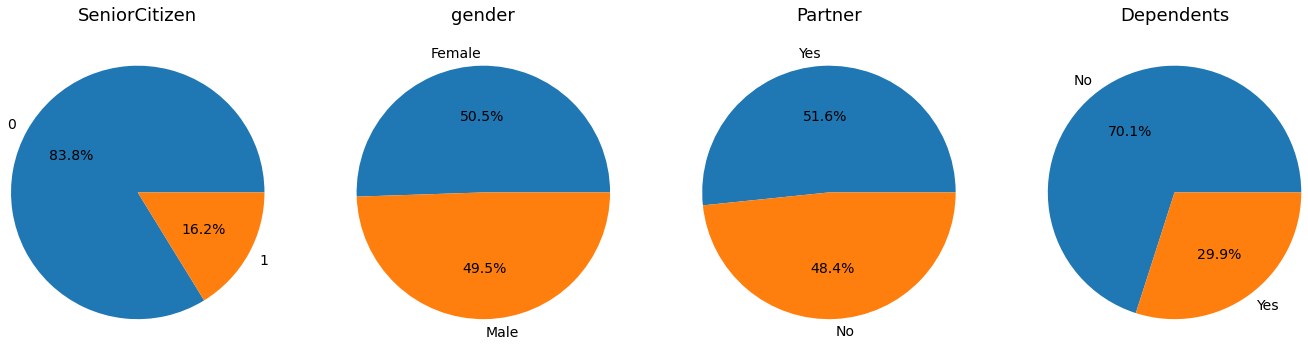

In [13]:
# Illustrating the values and count of attributes using plots:

label_SenCit = df['SeniorCitizen'].unique()
value_SenCit = df['SeniorCitizen'].value_counts() / len(df) * 100

label_gen = df['gender'].unique()
value_gen = df['gender'].value_counts() / len(df) * 100

label_Part = df['Partner'].unique()
value_Part = df['Partner'].value_counts() / len(df) * 100

label_Dep = df['Dependents'].unique()
value_Dep = df['Dependents'].value_counts() / len(df) * 100

fig = plt.figure()

ax1 = fig.add_axes([0, 0, 0.5, 0.5], aspect=2)
ax1.pie(value_SenCit, textprops={'size': 14}, autopct='%1.1f%%', labels=label_SenCit, radius = 2.2)

ax2 = fig.add_axes([0.8, 0, 0.5, 0.5], aspect=2)
ax2.pie(value_gen, textprops={'size': 14}, autopct='%1.1f%%', labels=label_gen, radius = 2.2)

ax3 = fig.add_axes([1.6, 0, 0.5, 0.5], aspect=2)
ax3.pie(value_Part, textprops={'size': 14}, autopct='%1.1f%%', labels=label_Part, radius = 2.2)

ax4 = fig.add_axes([2.4, 0, 0.5, 0.5], aspect=2)
ax4.pie(value_Dep, textprops={'size': 14}, autopct='%1.1f%%', labels=label_Dep, radius = 2.2)

ax1.set_title('SeniorCitizen', loc='center', pad = 100, fontdict={'fontsize':18})
ax2.set_title('gender', loc='center', pad = 100, fontdict={'fontsize':18})
ax3.set_title('Partner', loc='center', pad = 100, fontdict={'fontsize':18})
ax4.set_title('Dependents', loc='center', pad = 100, fontdict={'fontsize':18})

plt.show()

<AxesSubplot:>

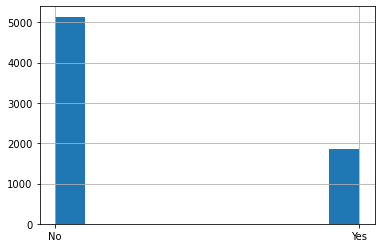

In [16]:
df['Churn'].hist()

In [19]:
# scatter_matrix(df,alpha=0.2, figsize=(10, 10))

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

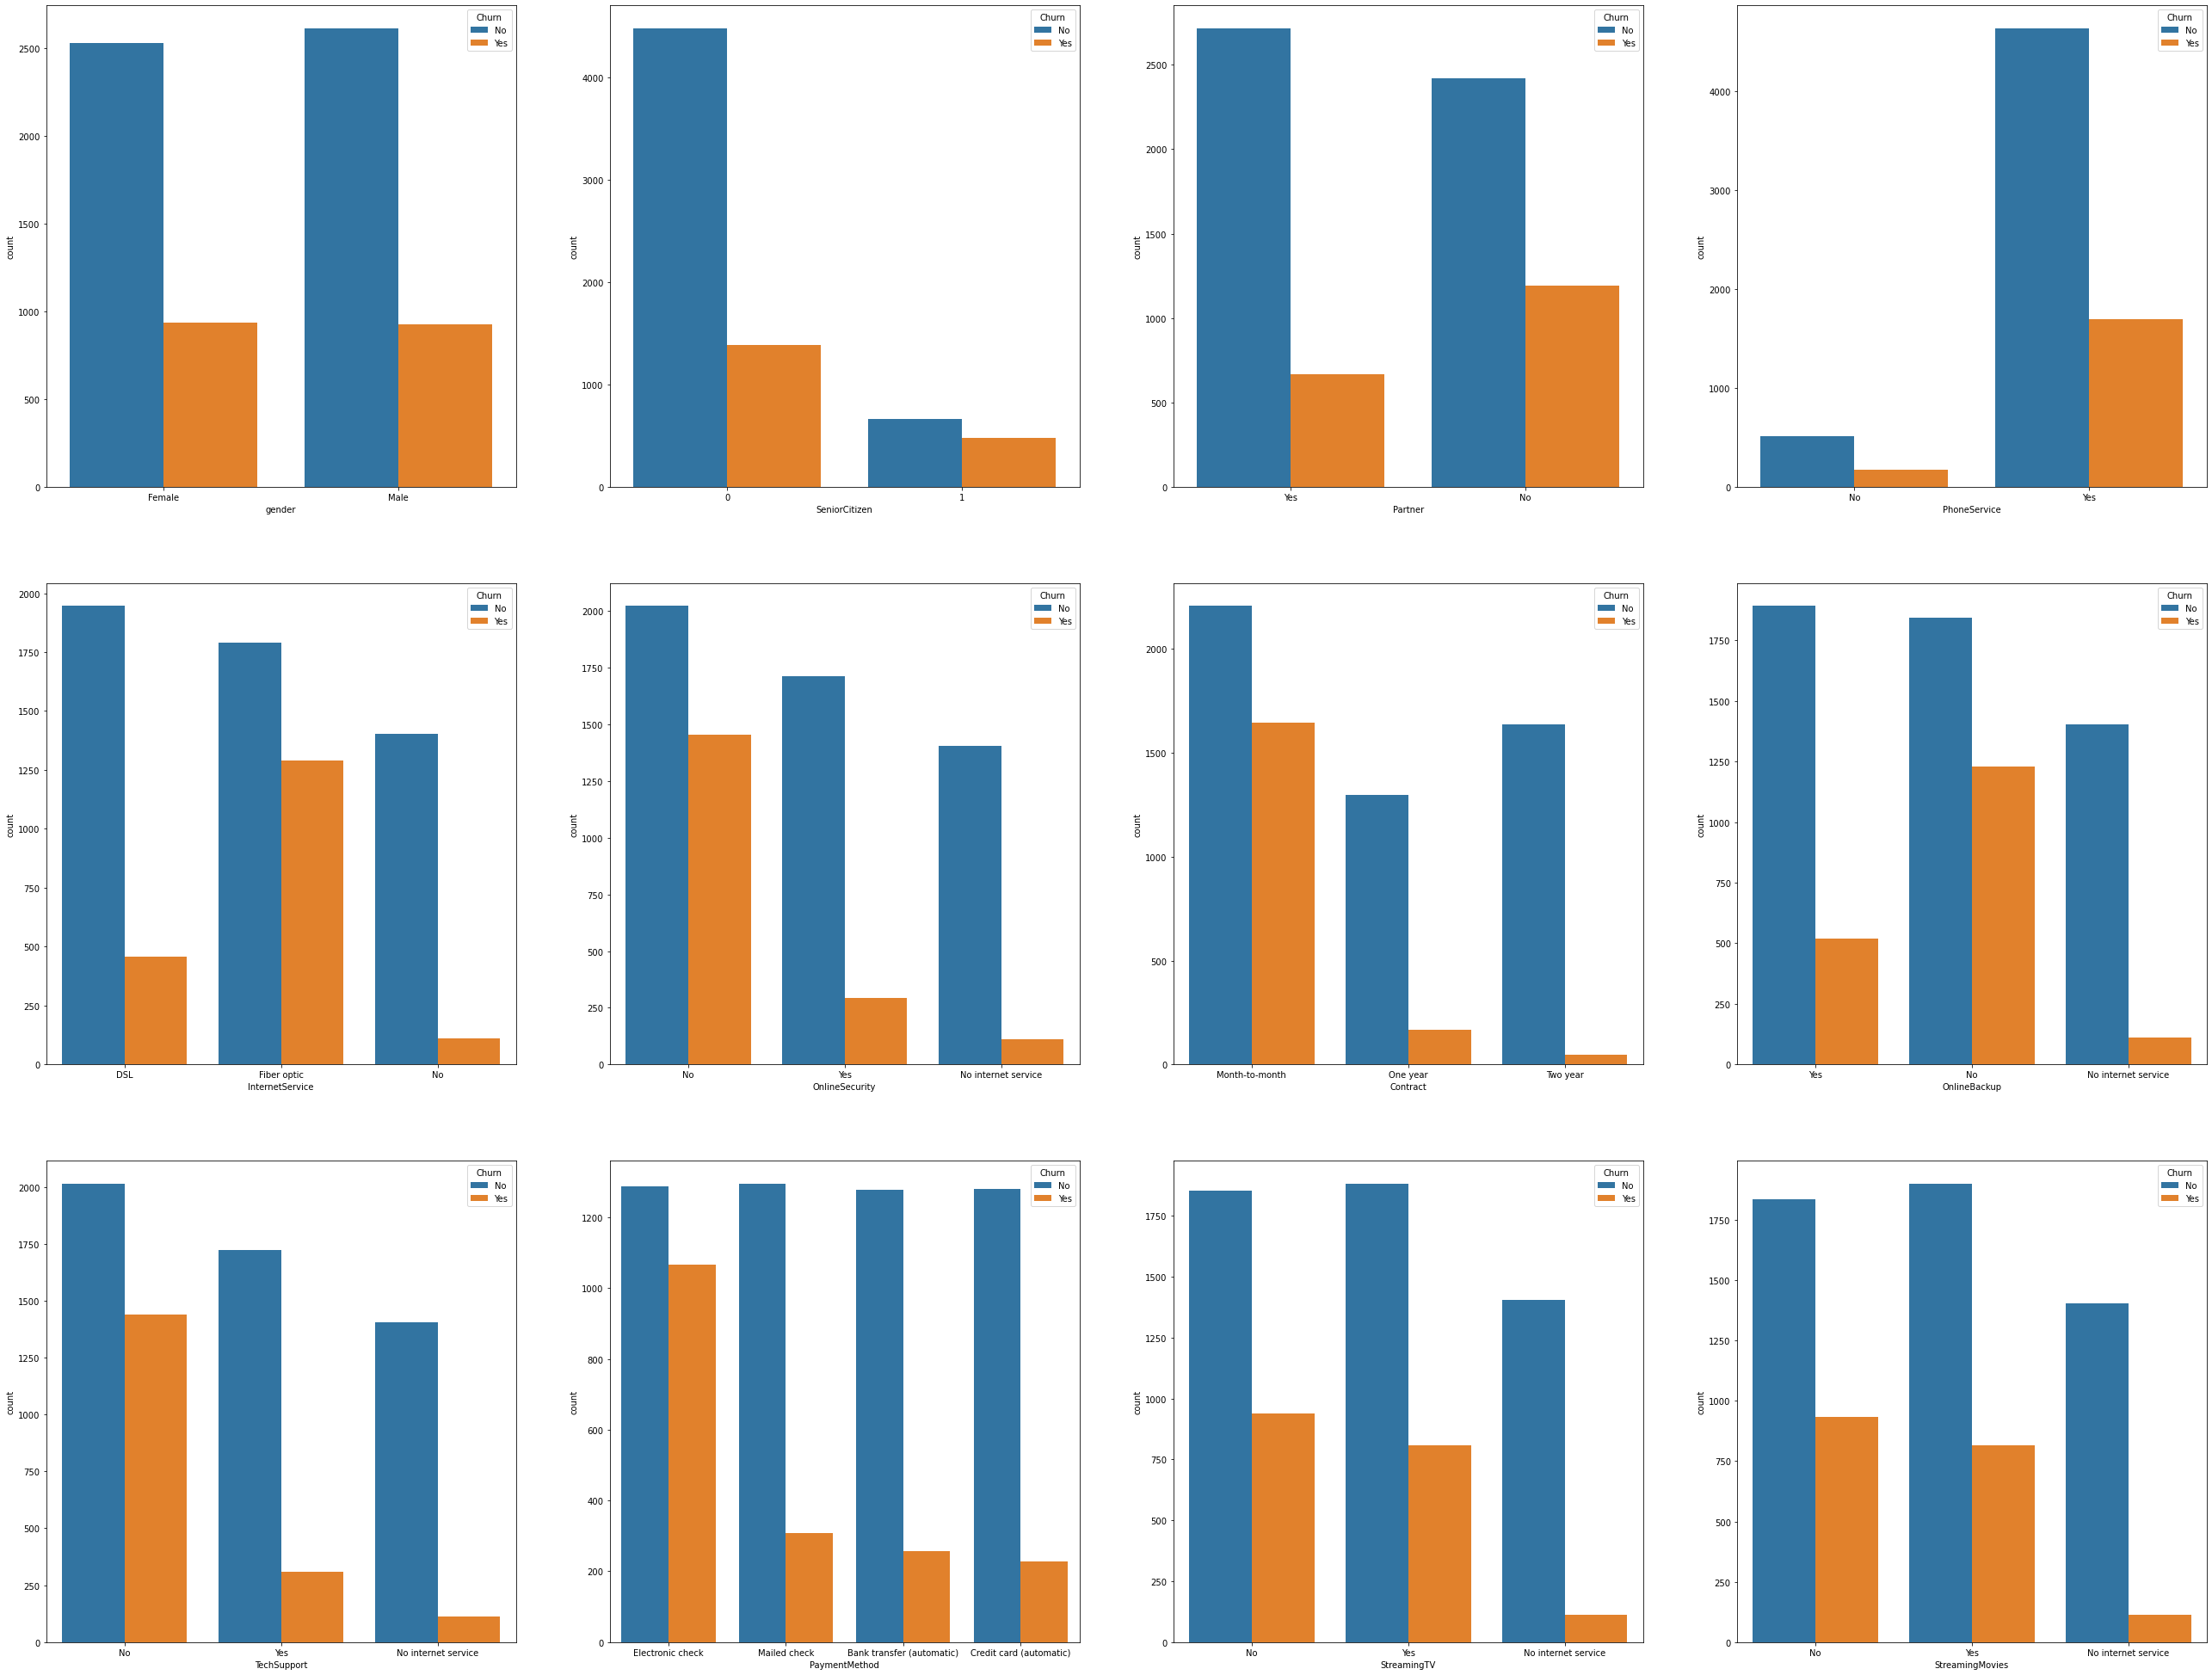

In [21]:
fig, axes = plt.subplots(nrows = 3,ncols = 4,figsize = (45,35))
sns.countplot(x="gender", hue="Churn", data=df, ax=axes[0][0] , fontsize=30)
sns.countplot(x="SeniorCitizen", hue="Churn", data=df,ax=axes[0][1] )
sns.countplot(x="Partner", hue="Churn", data=df,ax=axes[0][2] ) 
sns.countplot(x="PhoneService", hue="Churn", data=df,ax=axes[0][3] )

sns.countplot(x="InternetService", hue="Churn", data=df, ax=axes[1][0] )
sns.countplot(x="OnlineSecurity", hue="Churn", data=df,ax=axes[1][1] )
sns.countplot(x="Contract", hue="Churn", data=df,ax=axes[1][2] ) 
sns.countplot(x="OnlineBackup", hue="Churn", data=df,ax=axes[1][3] )


sns.countplot(x="TechSupport", hue="Churn", data=df, ax=axes[2][0] )
sns.countplot(x="PaymentMethod", hue="Churn", data=df,ax=axes[2][1] )
sns.countplot(x="StreamingTV", hue="Churn", data=df,ax=axes[2][2] ) 
sns.countplot(x="StreamingMovies", hue="Churn", data=df,ax=axes[2][3] )